In [5]:
import pandas as pd 
main_data = pd.read_csv(r'C:\Users\Mohamed\Downloads\result data\updated_final_dataset_for_Project2')

output_data =  pd.read_csv(r'C:\Users\Mohamed\Downloads\result data\scan_results_quick (1).csv')


merged_df = pd.merge(output_data, main_data, on=['Port', 'Protocol'], how='inner')
merged_df


,IP,Port,Protocol,State,Service,Service Name,Description,Risk,DDoS Risk,Open Port Danger,Prepare for Open Port,Recommended Action
0,192.168.1.2,135,TCP,open,msrpc,epmap,DCE endpoint resolution - Managed by network a...,Critical Risk,Low Risk,Used by DCOM and RPC; often targeted in exploits.,Disable unused RPC services and restrict access.,Immediate action required: Block the port and ...
1,192.168.1.2,139,TCP,open,netbios-ssn,netbios-ssn,NETBIOS Session Service - Managed by network a...,High Risk,Low Risk,NetBIOS Session Service can be unsafe if exposed.,Disable NetBIOS or limit it to trusted devices.,Implement tighter security and monitoring.
2,192.168.1.2,445,TCP,open,microsoft-ds,microsoft-ds,Microsoft-DS - Managed by network admin,Critical Risk,Low Risk,SMB can expose sensitive file shares if not se...,Allow only trusted devices and watch for unusu...,Immediate action required: Block the port and ...
3,192.168.1.2,5000,TCP,open,upnp,commplex-main,NaN,Very Low Risk,Low Risk,Low risk but should still be monitored for unu...,Allow only trusted devices and watch for unusu...,"No immediate threat, but stay alert."
4,192.168.1.2,5357,TCP,open,wsdapi,wsdapi,Web Services for Devices - Managed by network ...,Very Low Risk,Low Risk,Low risk but should still be monitored for unu...,Allow only trusted devices and watch for unusu...,"No immediate threat, but stay alert."


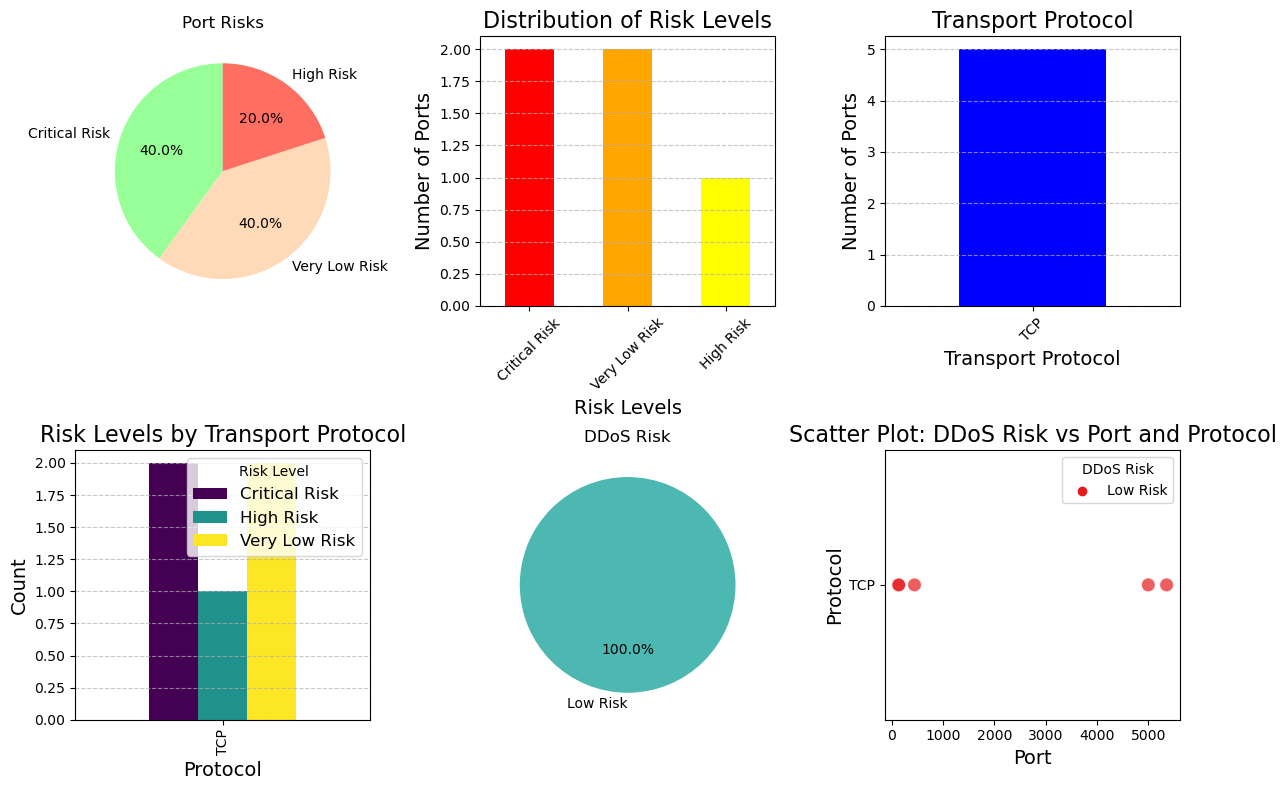

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Load data
main_data = pd.read_csv(r'C:\Users\Mohamed\Downloads\result data\updated_final_dataset_for_Project2')
output_data = pd.read_csv(r'C:\Users\Mohamed\Downloads\result data\scan_results_quick (1).csv')

# Merge datasets
merged_df = pd.merge(output_data, main_data, on=['Port', 'Protocol'], how='inner')
merged_df
# Function to plot risk distribution without "Other"
def plot_risk_distribution(merged_df, ax):
    category_counts = merged_df['Risk'].value_counts()

    # Plot without "Other"
    category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#98FF98', '#FFDAB9','#FF6F61','#4DB8B1'], ax=ax)
    ax.set_title('Port Risks')
    ax.set_ylabel('')  

# Function to plot risk levels

def plot_risk_levels(merged_df, ax):
    risk_counts = merged_df['Risk'].value_counts()

    risk_counts.plot(kind='bar', color=['red', 'orange', 'yellow', 'green', 'blue', 'purple'], ax=ax)
    ax.set_title('Distribution of Risk Levels', fontsize=16)
    ax.set_xlabel('Risk Levels', fontsize=14)
    ax.set_ylabel('Number of Ports', fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Function to plot transport protocol

def plot_transport_protocol(merged_df, ax):
    risk_counts = merged_df['Protocol'].value_counts()

    risk_counts.plot(kind='bar', color=['blue', 'purple','yellow', 'green'], ax=ax)
    ax.set_title('Transport Protocol', fontsize=16)
    ax.set_xlabel('Transport Protocol', fontsize=14)
    ax.set_ylabel('Number of Ports', fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Function to plot risk by protocol

def plot_risk_by_protocol(merged_df, ax):
    grouped_data = merged_df.groupby(['Protocol', 'Risk']).size().unstack(fill_value=0)

    grouped_data.plot(kind='bar', figsize=(12, 8), colormap='viridis', ax=ax)
    ax.set_title('Risk Levels by Transport Protocol', fontsize=16)
    ax.set_xlabel('Protocol', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.legend(title='Risk Level', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Function to plot DDoS risk distribution without "Other"

def plot_ddos_risk(merged_df, ax):
    category_counts = merged_df['DDoS Risk'].value_counts()

    # Plot without "Other"
    category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#4DB8B1', '#FF6F61'], ax=ax)
    ax.set_title('DDoS Risk')
    ax.set_ylabel('') 

# Function to plot scatter plot for Port vs Protocol

def plot_scatter_port_vs_protocol(merged_df, ax):
    sns.scatterplot(x='Port', y='Protocol', hue='DDoS Risk', data=merged_df, palette='Set1', s=100, edgecolor='w', alpha=0.7, ax=ax)
    ax.set_title('Scatter Plot: DDoS Risk vs Port and Protocol', fontsize=16)
    ax.set_xlabel('Port', fontsize=14)
    ax.set_ylabel('Protocol', fontsize=14)

# Create the plots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

plot_risk_distribution(merged_df, axs[0, 0])  
plot_risk_levels(merged_df, axs[0, 1])  
plot_transport_protocol(merged_df, axs[0, 2])  
plot_risk_by_protocol(merged_df, axs[1, 0])  
plot_ddos_risk(merged_df, axs[1, 1])  
plot_scatter_port_vs_protocol(merged_df, axs[1, 2])  

plt.tight_layout()
plt.show()
